What happens to NIFTY for a week if Monday is in deep red?

n : Percent down change greater than n on monday

In [17]:
n = -2

In [18]:
import numpy as np
import pandas as pd

from scipy import stats

import datetime
from datetime import timedelta

import niftyutils
from niftyutils import load_nifty_data

import matplotlib.pyplot as plt
import mplfinance as fplt

In [19]:
start_date = datetime.datetime(2005,8,1)
end_date = datetime.datetime(2020,8,29)
nifty_data = load_nifty_data(start_date,end_date)

In [20]:
daily_returns = (nifty_data['Close']/nifty_data['Close'].shift(1) - 1)*100
daily_returns = daily_returns.dropna()

In [21]:
four_days_returns = (nifty_data['Close']/nifty_data['Close'].shift(4) - 1)*100
four_days_returns = four_days_returns.dropna()

# 3 days return to be calculated for truncated weeks
three_days_returns = (nifty_data['Close']/nifty_data['Close'].shift(3) - 1)*100
three_days_returns = three_days_returns.dropna()

#### Filter mondays and study returns

In [22]:
mondays = daily_returns[(daily_returns.index.weekday == 0)]

In [23]:
monday_weekly_returns = []
for date in mondays.index:
    try:
        ret = four_days_returns[niftyutils.datetime_to_datetime_str(date +  timedelta(days=4))]
        monday_weekly_returns.append((date,ret))
    except KeyError:
        pass
        #print('Truncated week for ~ %s' % date)

In [24]:
weekly_returns_after_monday = pd.DataFrame(monday_weekly_returns).set_index(0)[1]

In [25]:
weekly_returns_after_monday.describe()

count    698.000000
mean       0.190302
std        2.768125
min      -17.253747
25%       -1.190761
50%        0.305454
75%        1.692017
max       13.797181
Name: 1, dtype: float64

#### Filter only monday with greater down move than n

In [26]:
blood_mondays = daily_returns[(daily_returns.index.weekday == 0) & (daily_returns <= n)]

In [27]:
blood_monday_weekly_returns = []
for date in blood_mondays.index:
    try:
        ret = four_days_returns[niftyutils.datetime_to_datetime_str(date +  timedelta(days=4))]
        blood_monday_weekly_returns.append((date,ret))
    except KeyError:
        print('Truncated week for ~ %s' % date)

Truncated week for ~ 2007-02-12 00:00:00
Truncated week for ~ 2007-04-02 00:00:00
Truncated week for ~ 2007-12-17 00:00:00
Truncated week for ~ 2008-03-17 00:00:00
Truncated week for ~ 2009-03-30 00:00:00


In [28]:
weekly_returns_after_blood_monday = pd.DataFrame(blood_monday_weekly_returns).set_index(0)[1]

In [29]:
weekly_returns_after_blood_monday.describe()

count    53.000000
mean      0.049876
std       5.018419
min     -14.099206
25%      -2.437976
50%      -0.052775
75%       3.340612
max      13.797181
Name: 1, dtype: float64

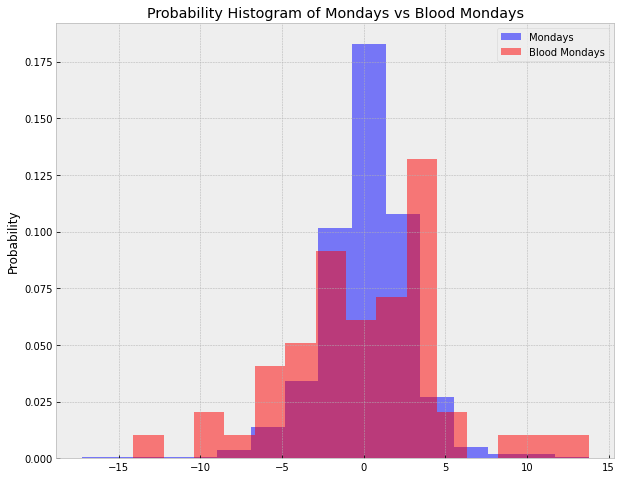

In [30]:
plt.figure(figsize=[10,8])
plt.style.use("bmh")
kwargs = dict(alpha=0.5, bins=15, density=True, stacked=True)

plt.hist(weekly_returns_after_monday, **kwargs, color='b', label='Mondays')
plt.hist(weekly_returns_after_blood_monday, **kwargs, color='r', label='Blood Mondays')
plt.gca().set(title='Probability Histogram of Mondays vs Blood Mondays', ylabel='Probability')
plt.legend();

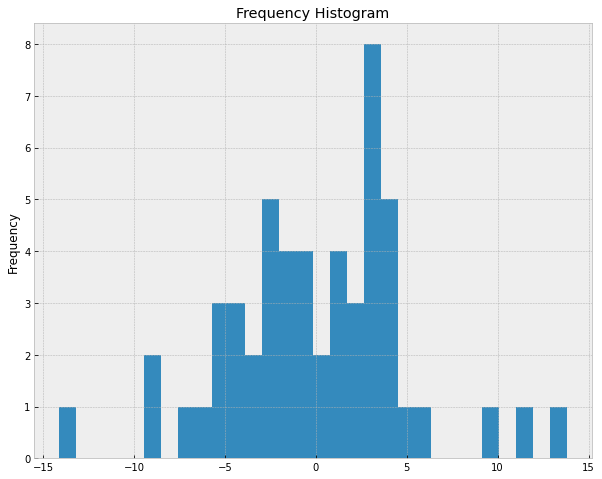

In [31]:
plt.figure(figsize=[10,8])
plt.style.use("bmh")

plt.hist(weekly_returns_after_blood_monday, bins=30)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [32]:
weekly_returns_after_blood_monday[weekly_returns_after_blood_monday.between(-0.4,0.4)]

0
2008-06-09    0.358813
2019-07-08   -0.052775
Name: 1, dtype: float64

### How returns look like across days for a week

In [44]:
pct_change_for_mondays = []
for ix, pct_chage in blood_mondays.iteritems():
    pct_change_by_day = []
    for i in range(1,5):
        try:
            after_ix = ix + timedelta(days=i)
            ret = daily_returns.loc[after_ix]
        except KeyError:
            ret = np.nan
        pct_change_by_day.append(ret)
    
    pct_change_for_mondays.append(pct_change_by_day)

In [51]:
blood_monday_study_data = pd.DataFrame(pct_change_for_mondays, columns=['Tuesday','Wednesday','Thursday','Friday'],
                                                  index = blood_mondays.index)
blood_monday_study_data['Monday'] = blood_mondays.values
blood_monday_study_data = blood_monday_study_data[['Monday','Tuesday','Wednesday','Thursday','Friday']]

In [52]:
blood_monday_study_data.head()

,Monday,Tuesday,Wednesday,Thursday,Friday
Date,,,,,
2005-10-24,-2.001023,0.975009,-0.401125,-2.308491,-1.566152
2006-05-15,-4.030082,0.580939,3.173162,-6.772854,-4.190150
2006-05-22,-5.098710,3.829490,-2.619282,1.994832,1.003871
2006-06-05,-2.416420,-2.630401,-2.616348,-4.757993,5.210417
2006-06-12,-3.120748,-4.089166,-1.145196,6.305074,3.271045


<AxesSubplot:>

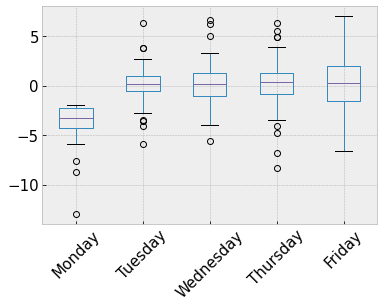

In [54]:
blood_monday_study_data.boxplot(grid=True, rot=45, fontsize=15)

<AxesSubplot:xlabel='Monday', ylabel='Friday'>

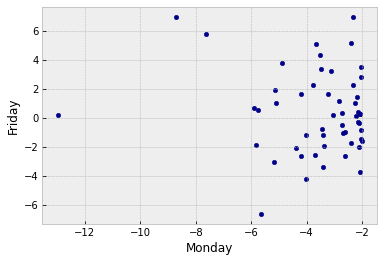

In [65]:
blood_monday_study_data.plot.scatter(x='Monday', y='Friday', c='DarkBlue')

<AxesSubplot:xlabel='Monday', ylabel='Tuesday'>

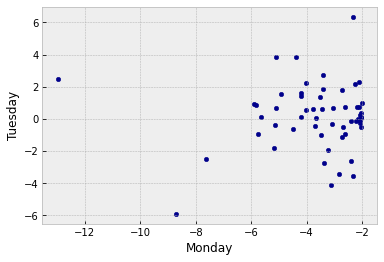

In [66]:
blood_monday_study_data.plot.scatter(x='Monday', y='Tuesday', c='DarkBlue')

<AxesSubplot:xlabel='Monday', ylabel='Thursday'>

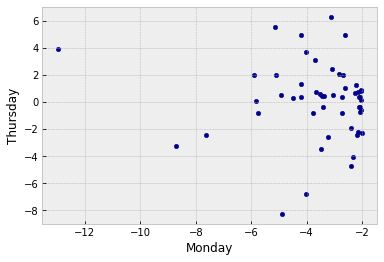

In [68]:
blood_monday_study_data.plot.scatter(x='Monday', y='Thursday', c='DarkBlue')

In [69]:
blood_monday_study_data.describe()

,Monday,Tuesday,Wednesday,Thursday,Friday
count,58.000000,57.000000,58.000000,52.000000,53.000000
mean,-3.685015,0.149557,0.154469,0.103446,0.389757
std,1.921699,2.022841,2.257101,2.804567,2.858834
min,-12.980464,-5.941868,-5.556454,-8.301939,-6.651203
25%,-4.333213,-0.510463,-1.098590,-0.826396,-1.566152
50%,-3.304414,0.117979,0.110309,0.390145,0.217556
75%,-2.270301,0.975009,1.268327,1.282547,1.939639
max,-2.001023,6.354489,6.624749,6.305074,6.990972


In [75]:
blood_monday_study_data[blood_monday_study_data['Monday'].between(-3,-2)].describe()

,Monday,Tuesday,Wednesday,Thursday,Friday
count,25.000000,25.000000,25.000000,24.000000,25.000000
mean,-2.287623,0.124157,-0.038826,-0.207172,0.362555
std,0.265770,1.941579,1.856324,2.066848,2.405413
min,-2.839475,-3.558921,-3.578069,-4.757993,-3.709609
25%,-2.416420,-0.500042,-0.778028,-1.107764,-1.050899
50%,-2.168696,-0.023359,-0.097939,0.245590,0.168450
75%,-2.081393,0.753791,0.914050,0.811056,1.186558
max,-2.001023,6.354489,5.045230,4.952098,6.990972


<AxesSubplot:>

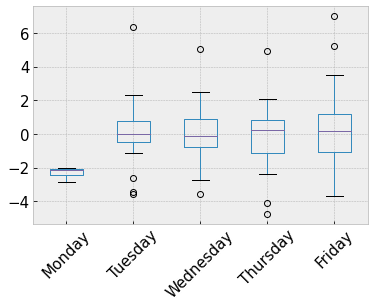

In [77]:
blood_monday_study_data[blood_monday_study_data['Monday'].between(-3,-2)].boxplot(grid=True, rot=45, fontsize=15)

In [79]:
blood_monday_study_data[(blood_monday_study_data['Monday'].between(-3,-2)) &
                        (blood_monday_study_data['Tuesday'] < 0) &
                        (blood_monday_study_data['Wednesday'] < 0)]

,Monday,Tuesday,Wednesday,Thursday,Friday
Date,,,,,
2006-06-05,-2.416420,-2.630401,-2.616348,-4.757993,5.210417
2008-06-02,-2.679616,-0.500042,-2.762993,1.992106,-1.050899
2008-12-01,-2.620595,-0.935555,-0.050794,4.952098,-2.639885
2014-01-27,-2.088802,-0.156458,-0.097939,-0.760590,0.260138
2015-03-09,-2.025118,-0.510463,-0.138888,0.874143,-1.461372
2016-01-04,-2.158680,-0.085352,-0.560719,-2.230978,0.436690
2019-07-08,-2.138234,-0.023359,-0.493255,0.730505,-0.262456
2020-02-24,-2.081393,-0.266286,-1.012045,-0.387036,-3.709609


In [80]:
blood_monday_study_data[(blood_monday_study_data['Monday'].between(-3,-2)) &
                        (blood_monday_study_data['Tuesday'] < 0) &
                        (blood_monday_study_data['Wednesday'] < 0)].describe()

,Monday,Tuesday,Wednesday,Thursday,Friday
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,-2.276107,-0.638489,-0.966623,0.051532,-0.402122
std,0.259111,0.857468,1.109565,2.881278,2.676679
min,-2.679616,-2.630401,-2.762993,-4.757993,-3.709609
25%,-2.467464,-0.616736,-1.413120,-1.128187,-1.756000
50%,-2.148457,-0.383164,-0.526987,0.171734,-0.656677
75%,-2.086950,-0.138681,-0.128651,1.153634,0.304276
max,-2.025118,-0.023359,-0.050794,4.952098,5.210417
